# Errores comunes al crear visualizaciones interactivas

- **Objetivos**
    - Identificar los errores que se cometen al crear visualizaciones
    - Aplicar técnicas para corregir los errores y crear visualizaciones eficaces
    - Seleccionar y diseñar las visualizaciones adecuadas para determinados tipos de datos
    - Describir las diferentes bibliotecas y herramientas disponibles para crear visualizaciones

## Introducción

- En éste capítulo se enumera y explica los posibles fallos y errores que se cometen durante varias etapas del proceso de visualización de datos, como la visualización de elementos no correlacionados de un conjunto de datos para mostrar una relación o crear una característica interactiva inapropiada
- El proceso de visualización de datos puede parecer sencillo: tome algunos datos, trace algunos gráficos, añadir algunas características interactivas, y el trabajo está hecho. O, tal vez, no lo sea: podrían haber varios lugares durante el trayecto en los que se pueden cometer errores. Estos errores terminan por dar lugar a una visualización defectuosa que no puede de manera fácil y eficaz transmitir lo que dicen los datos, lo que hace que sea completamente inútil para el público que lo está viendo.

## Formato e interpretación de datos

- La primera fase de la visualización de datos es entender los datos frente a ti: entender lo que es, lo que significa y lo que transmite. Sólo cuando entiendas los datos serás capaz de diseñar una visualización que ayude a otros a entenderlos.

- Además, es importante asegurarse de que los datos tienen sentido y contienen suficiente información, ya sea categórica, numérica o una mezcla de ambas, para ser visualizados. Por lo tanto, si tratas con datos erróneos o sucios, es probable que la visualización sea defectuosa.

- En esta siguiente sección, veremos algunas formas de evitar los errores comunes que se suelen cometidos en esta fase de los datos y cómo evitarlos.

**¿Cómo evitar los errores más comunes al tratar con datos sucios?**

- Garbage In, Garbage Out - este es un dicho popular en el campo de la ciencia de datos, especialmente con respecto a la visualización de datos. Básicamente significa que si utilizas datos desordenados y ruidosos, vas a obtener una visualización defectuosa y poco informativa. Los datos desordenados, ruidosos y sucios corresponden a una serie de problemas que se encuentran en los datos. Vamos a discutir los problemas uno por uno y las formas de tratar este tipo de datos.

**Valores atípicos**

- Los datos que contienen valores inexactos o instancias que son significativamente diferentes del resto de los datos de un conjunto de datos se denominan valores atípicos. Estos valores atípicos pueden ser auténticos, es decir, parecen incorrectos pero en realidad no lo son, o son errores que se cometen al recoger o almacenar los datos. Veamos un ejemplo de un error cometido al recoger o almacenar los datos. La siguiente tabla muestra la edad, el peso y el sexo de los clientes que acuden a un determinado gimnasio. La columna de sexo consta de tres valores discretos 0, 1 y 2 que corresponden todos a una clase: hombre, mujer y otro, respectivamente. La columna de la edad se expresa en años y la columna de peso está en kilogramos

![](figures/Figure701.png)

- Todo parece correcto hasta que llegamos a la cuarta instancia (índice 3), donde el peso peso es de 790 kg. Esto parece extraño porque nadie puede pesar realmente 790 kg, especialmente alguien cuya estatura es de 1,5 metros y 7 pulgadas. Quien haya almacenado estos datos debe haber querido decir 79 kg y haber añadido un 0 por error. Este es un caso de un valor atípico en el conjunto de datos. Esto puede parecer trivial en este momento, sin embargo, esto puede resultar en visualizaciones defectuosas, y predicciones o patrones de modelos de aprendizaje automático, especialmente si hay múltiples repeticiones de esos datos. Ahora, veamos un ejemplo de un auténtico valor atípico en la siguiente tabla

![](figures/Figure702.png)

- El peso en el cuarto caso (índice 3) es de 167 kilogramos, lo que parece extrañamente alto. Sin embargo, sigue siendo un valor verosímil, ya que es posible que alguien tenga un peso de 167 kilogramos a los 37 años. Por lo tanto, se trata de un un verdadero valor atípico. Mientras que en los ejemplos anteriores es fácil detectar el valor atípico, ya que sólo hay 5 casos, en realidad, nuestros conjuntos de datos son masivos, por lo que comprobar cada caso es una tarea tediosa y poco práctica. Por lo tanto, en la vida real, podemos utilizar visualizaciones estáticas básicas, como los gráficos de caja, para observar la existencia de valores atípicos. Los gráficos de caja son visualizaciones de datos sencillas pero informativas que pueden decirnos mucho sobre la sobre la forma en que se distribuyen nuestros datos. Muestran el rango de nuestros datos basándose en cinco valores clave:
    - El valor mínimo de la columna
    - El primer cuartil
    - La mediana
    - El tercer cuartil
    - El valor máximo de la columna
- Esto es lo que hace que sean excelentes para mostrar los valores atípicos, además de describir la simetría de los datos, el grado de agrupación de los mismos (si todos los valores están repartidos en un amplio rango), y si están o no sesgados.

## Ejercicio 52: Visualización de valores atípicos en un conjunto de datos con un gráfico de cajas

- En este ejercicio, vamos a crear un gráfico de caja para comprobar si nuestro conjunto de datos contiene valores atípicos. Vamos a utilizar el conjunto de datos *gym.csv*, que contiene información sobre los clientes de un determinado gimnasio.

- Importar las librerías necesarias

In [31]:
import pandas as pd
import numpy as np
import plotly.express as px

- Guarda el archivo *gym.csv* en un DataFrame llamado **gym**, e imprime las cinco primeras filas del mismo para ver cómo son los datos

In [32]:
gym = pd.read_csv('https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/gym.csv')
gym.head()

,age,weight,sex
0,29,88,2
1,45,96,1
2,35,91,0
3,37,790,1
4,27,62,0


- Como puede ver, nuestros datos tienen tres columnas: edad, peso y sexo. La columna sexo consta de tres valores discretos que corresponden a tres clases discretas - 0 es hombre, 1 es mujer y 2 es otro.
- Cree un gráfico de caja con el eje $x$ como columna de sexo y el eje $y$ como peso

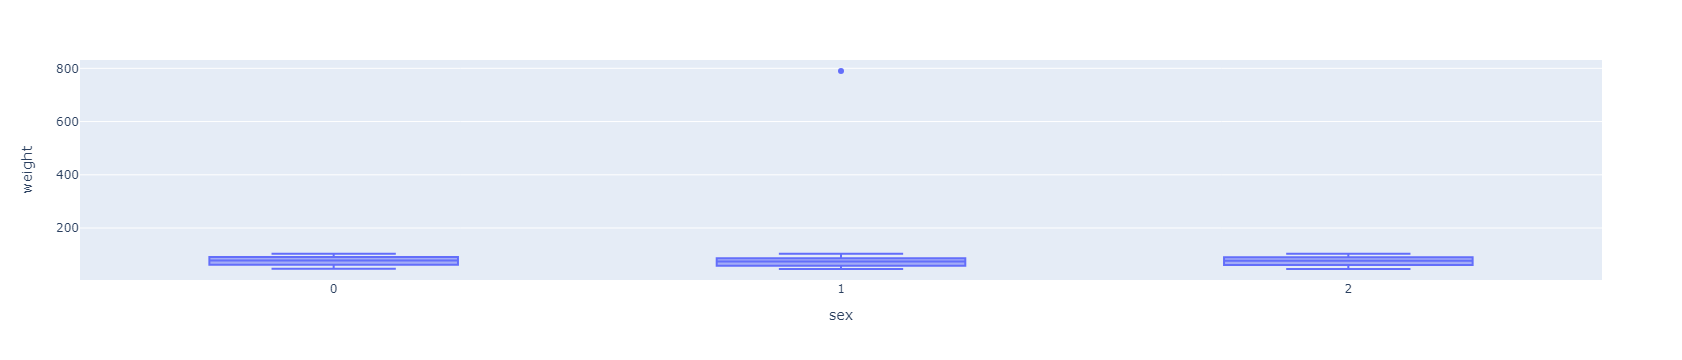

In [33]:
fig = px.box(gym, x = 'sex', y = 'weight', notched = False)
fig.show()

- La escala del eje $y$ es extrañamente grande, ya que todos los gráficos de caja están comprimidos en la octava parte inferior del gráfico, por lo que no representa una visualización clara de los datos. Esto se debe al valor atípico en la cuarta instancia de nuestro `DataFrame` **790 kg**
- Todos los valores parecen estar bien, excepto ese valor atípico en la parte superior del gráfico con **max=790**. Ahora, veremos las formas de tratar los valores atípicos.

**Cómo tratar los valores atípicos**

Hay tres formas principales de tratar los valores atípicos:

- **Eliminación**: Si sólo hay unas pocas instancias (filas) que poseen valores atípicos, entonces esas instancias pueden ser eliminadas completamente del conjunto de datos, dejando así un conjunto de datos con cero valores atípicos. También hay ocasiones en las que una determinada característica (columna) contiene un gran número de valores atípicos. En tal caso, esa característica concreta puede eliminarse del conjunto de datos pero sólo si esa característica es insignificante. Sin embargo, la eliminación de datos no siempre es la mejor idea.

- **Imputación**: La imputación es una opción mejor que la eliminación, especialmente si hay muchos valores atípicos en el conjunto de datos. Esto puede hacerse de tres maneras:
    - La forma más común es imputar los valores atípicos con la **media**, la **mediana** o la **moda** de la columna. Sin embargo, en el caso de muchos valores atípicos, estos valores pueden no ser lo suficientemente bueno, ya que cada valor atípico será un problema, debido a que cada uno de estos valores será sustituido por el mismo valor (la **media**, la **mediana** o la **moda**)
    - El otro método para obtener mejores valores para los valores atípicos, especialmente en el caso de de **series temporales**, es la **interpolación lineal**, es decir, el uso de polinomios lineales para crear nuevos puntos de datos dentro de un rango definido de puntos conocidos para reemplazar valores atípicos.
    - Un modelo de regresión lineal también puede utilizarse para predecir un valor que falta si es numérico, y en el caso de que el valor que falta sea categórico, se puede utilizar un modelo de regresión logística.
    - Por ejemplo, supongamos que tiene un conjunto de datos del que necesita mostrar una relación entre la altura y el peso. La columna de la altura tiene varios valores perdidos pero, como es una característica significativa, no puede eliminarla, ni tampoco puede imputar la media de la columna ya que eso podría llevar a una relación falsa. El conjunto de datos puede dividirse en dos conjuntos de datos
        - El conjunto de datos de entrenamiento, que contiene instancias sin valores perdidos
        - El nuevo conjunto de datos, que contiene sólo los casos en los que faltan valores en la columna de altura.
        - A continuación, se puede utilizar un modelo de regresión lineal en el conjunto de datos de entrenamiento. El modelo aprenderá de estos datos y, cuando se le proporcione el nuevo conjunto de datos, podrá predecir los valores de la columna de altura. Ahora, los dos conjuntos de datos pueden fusionarse juntos y ser utilizados para crear visualizaciones ya que no hay valores perdidos.
- **Transformación**: Es el proceso de transformación de los valores atípicos mediante la construcción de la columna de datos en la que se encuentra el valor atípico, por ejemplo, convirtiendo los valores en porcentajes y utilizando esa columna como característica en lugar de la columna original. En la siguiente sección, veremos un ejercicio para entender cómo podemos tratar los los valores atípicos.

## Ejercicio 53: Cómo tratar los valores atípicos

**Detección de valores atípicos**

- Si nuestro conjunto de datos es pequeño, podemos detectar el valor atípico simplemente mirando el conjunto de datos. Pero si tenemos un conjunto de datos enorme, ¿cómo podemos identificar los valores atípicos? Tenemos que utilizar técnicas de visualización y matemáticas. A continuación se presentan algunas de las técnicas de detección de valores atípicos

    - Boxplots
    - Puntuación $Z$
    - Rango intercuantil **(IQR)**

**Detección de valores atípicos mediante las puntuaciones $Z$**

- **Criterio**: Cualquier dato cuya puntuación $Z$ esté fuera de la tercera desviación estándar es un valor atípico

![](figures/z_score.png)

**Implementación**:

- Recorrer todos los datos y calcular la puntuación $Z$ mediante la fórmula $(X_{i}-\mu)/\sigma$. Definir un valor de umbral de 3 y marcar los puntos de datos cuyo valor absoluto de puntuación $Z$ sea mayor que el umbral como valores atípicos.

In [34]:
import numpy as np

In [35]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [36]:
sample_outliers = detect_outliers_zscore(gym.weight)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [790]


**Detección de valores atípicos mediante el rango intercuantil (IQR)**

- **Criterio**: Los datos que se sitúan 1.5 veces del **IQR** por encima de $Q_{3}$ y por debajo de $Q_{1}$ son valores atípicos.

**Implementación**

- Ordenar el conjunto de datos de forma ascendente
- Calcular los cuartiles 1 y 3 $(Q_{1}, Q_{3})$
- Calcular $IQR=Q_{3}-Q_{1}$
- Calcular el límite inferior = $(Q_{1}-1.5*IQR)$, el límite superior = $(Q_{3}+1.5*IQR)$, recorrer los valores del conjunto de datos y comprobar los que están por debajo del límite inferior y por encima del límite superior y marcarlos como valores atípicos

In [37]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [38]:
sample_outliers = detect_outliers_iqr(gym.weight)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [790]


**Tratamiento de los valores atípicos**

**Eliminación**

- En este ejercicio, vamos a eliminar la instancia que contiene el valor atípico del conjunto de datos que utilizamos en el Ejercicio 52, y visualizamos el conjunto de datos de nuevo generando un gráfico de caja basado en el nuevo conjunto de datos.

- Importar las librerías necesarias

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px

- Guarda el archivo *gym.csv* en un DataFrame llamado **gym**, e imprime las cinco primeras filas del mismo para ver cómo son los datos

In [40]:
gym = pd.read_csv('https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/gym.csv')
gym.head()

,age,weight,sex
0,29,88,2
1,45,96,1
2,35,91,0
3,37,790,1
4,27,62,0


- Modificar el DataFrame del gimnasio para que sólo esté formado por los casos en los que el peso sea inferior a 103 e imprimir las cinco primeras filas:

In [41]:
gym_del = gym[gym.weight < 104]
gym_del.head()

,age,weight,sex
0,29,88,2
1,45,96,1
2,35,91,0
4,27,62,0
5,58,55,0


- Vamos a crear un boxplot para ver el aspecto de los datos

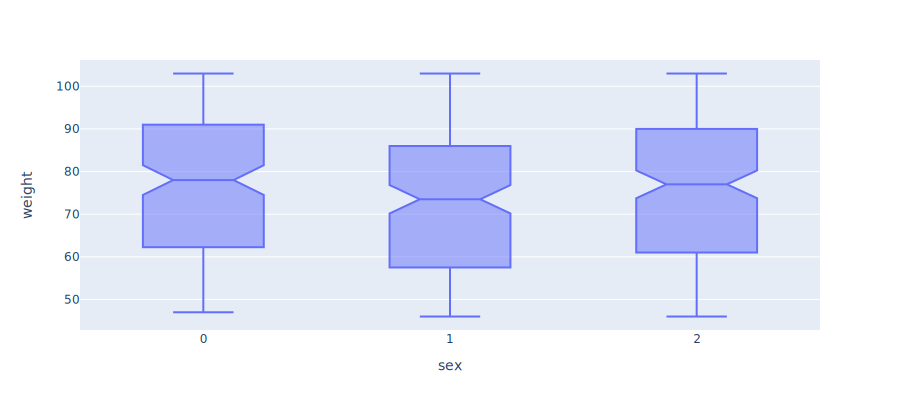

In [42]:
fig1 = px.box(gym_del, x = 'sex', y = 'weight', notched = True)
fig1.show(renderer="svg", width=900, height=410)

**Imputación por medio de la *media, mediana o moda***

- Como el valor medio es sensible a valores atípicos, se aconseja sustituirlos por la mediana

In [43]:
median = np.median(gym.weight)
print("median: ", median)

for outlier in sample_outliers:
    gym.weight = np.where(gym.weight == outlier, median, gym.weight)

median:  76.0


In [44]:
gym.head()

,age,weight,sex
0,29,88.0,2
1,45,96.0,1
2,35,91.0,0
3,37,76.0,1
4,27,62.0,0


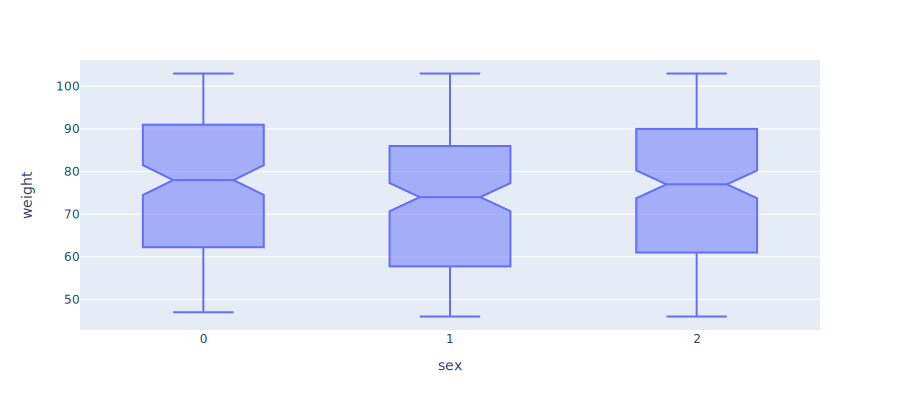

In [45]:
fig1 = px.box(gym, x = 'sex', y = 'weight', notched = True)
fig1.show(renderer="svg", width=900, height=410)

## Ejercicio 54: Tratamiento de los valores faltantes

**Datos faltantes**

- Los datos perdidos son, como su nombre indica, valores que están en blanco (**NaN, -, 0** cuando no deberían ser **0**, etc.). Al igual que los valores atípicos, los valores perdidos pueden ser problemáticos tanto en el caso de las visualizaciones como en el de los modelos predictivos.

- Los valores faltantes en las visualizaciones pueden mostrar una tendencia que en realidad no existe o no representa una relación entre dos variables que, en realidad, es significativa. Aunque es posible crear visualizaciones con un conjunto de datos que contenga valores perdidos, no se recomienda hacerlo. Al hacerlo, se ignoran los casos en los que se encuentran esos valores perdidos, creando así una visualización basada en algunos de los datos pero no en todos. 

- Por lo tanto, el tratamiento de los valores perdidos es de suma importancia. Existen dos enfoques principales para tratar los valores perdidos: la supresión y la imputación, ambos discutidos en términos de tratamiento de los valores atípicos. La La misma lógica se aplica a los valores perdidos.


- En este ejercicio, vamos a trabajar con un conjunto de datos que tiene siete valores perdidos en forma de 0s. En primer lugar, eliminaremos las instancias que contienen estos valores perdidos y generar un gráfico de caja para ver el impacto que la eliminación de un gran número de instancias en nuestra visualización. A continuación, imputaremos el valor de la mediana de la columna que que contiene los valores perdidos y generaremos un gráfico de caja basado en este conjunto de datos imputados.

- Importar las librerías necesarias

In [46]:
import pandas as pd
import numpy as np
import plotly.express as px

- Guarda el archivo *weight.csv* en un `DataFrame` llamado **weight**, e imprime las cinco primeras filas del mismo para ver cómo son los datos y utiliza la función `.describe()` para mostrar información sobre ella

In [47]:
w = pd.read_csv('https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/weight.csv')
w.head()

,weight,sex
0,47,2
1,0,1
2,35,0
3,34,1
4,0,0


In [48]:
w.describe()

,weight,sex
count,62.000000,62.000000
mean,33.887097,0.838710
std,15.683451,0.813685
min,0.000000,0.000000
25%,25.000000,0.000000
50%,35.000000,1.000000
75%,46.000000,1.750000
max,56.000000,2.000000


- Como podemos ver, el valor de peso mínimo en nuestro conjunto de datos es **0**; sin embargo, nadie puede pesar **0 kgs**, lo que significa que tenemos valores faltantes en forma de **0s**. Intentemos eliminar estas instancias.

- Cree un nuevo `DataFrame` que conste sólo de las instancias en las que el peso no sea igual a **0**. Muestre información sobre este nuevo `DataFrame`

In [49]:
doc_w = w[w.weight != 0]
doc_w.describe()

,weight,sex
count,55.00000,55.000000
mean,38.20000,0.836364
std,10.49056,0.811118
min,21.00000,0.000000
25%,31.00000,0.000000
50%,36.00000,1.000000
75%,46.50000,1.500000
max,56.00000,2.000000


- Crea un `boxplot` con este nuevo `DataFrame`, con el eje $x$ como sexo y el eje $y$ como peso

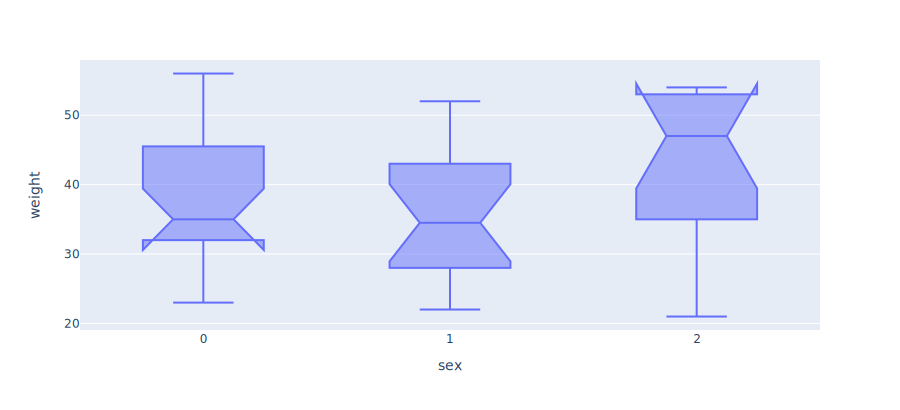

In [50]:
fig1 = px.box(doc_w, x = 'sex', y = 'weight', notched = True)
fig1.show(renderer="svg", width=900, height=410)

- Ahora, el valor del peso mínimo es 21, lo que tiene más sentido. Sin embargo, nuestro conteo se ha reducido a 55 de 62, lo que significa que hemos eliminado 7 instancias de nuestro conjunto de datos. Esto puede parecer pequeño en este ejemplo, pero en realidad, esto puede tener repercusiones serias en la información obtenida.

- Además, en el gráfico de caja anterior, el extremo inferior de la caja para el sexo 0 y el extremo superior de la caja para el sexo 2 es ligeramente anormal. Por lo tanto, sustituyamos los valores 0 de la columna de peso por el valor medio de la columna. Recuerde que tenemos que calcular la media de la columna **¡columna sin tener en cuenta esos valores 0!** Si los tenemos en cuenta, entonces nuestra media será incorrecta.

- Calcular la media de la columna de pesos del `DataFrame` que consiste en sólo valores de peso distintos de cero

In [51]:
mean_w = doc_w['weight'].mean()
mean_w

38.2

- Utilice la función `.replace()` para sustituir los valores **0** presentes en la columna **weight** del `DataFrame` original por la media de la columna **weight** del modificado. Guarde esto en un nuevo `DataFrame`

In [52]:
w_new = w.replace({'weight': {0: mean_w}})

- Muestra la información del nuevo `DataFrame`

In [53]:
w_new.describe()

,weight,sex
count,62.000000,62.000000
mean,38.200000,0.838710
std,9.870307,0.813685
min,21.000000,0.000000
25%,31.250000,0.000000
50%,38.100000,1.000000
75%,46.000000,1.750000
max,56.000000,2.000000


- Nuestro recuento es de 62, lo que significa que tenemos todas las instancias, y nuestro peso mínimo es 21, lo que significa que no tenemos ningún **0**.

- Cree un gráfico de caja con este nuevo `DataFrame`, con el eje $x$ como **sex** y el eje $y$ como **weight**.

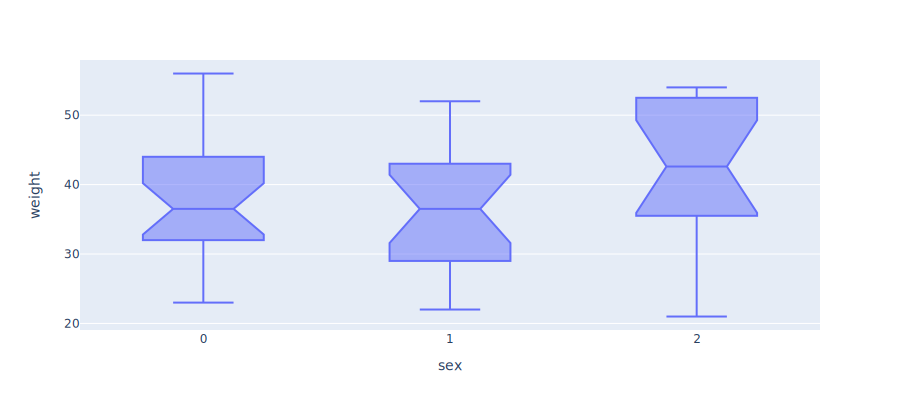

In [54]:
fig2 = px.box(w_new, x = 'sex', y = 'weight', notched = True)
fig2.show(renderer="svg", width=900, height=410)

- Ahora, tenemos una visualización que no tiene valores perdidos y representa todas las instancias que están presentes en el conjunto de datos. Veamos el tercer problema que puede generar una visualización defectuosa.

**Instancias y/o funciones duplicadas**

- El tercer problema es la presencia de instancias y/o características duplicadas en un conjunto de datos. Se trata de elementos innecesarios en el conjunto de datos y, si no se eliminan, pueden pueden afectar a las tendencias y a los conocimientos que se muestran en una visualización.

- Por ejemplo, puede crear una visualización que muestre la relación entre el género de un adolescente y si toca el piano. Con un conjunto de datos sin valores atípicos, anomalías o valores perdidos, obtendrá una gran visualización. A partir de la visualización, podrá también podrá concluir que hay más mujeres que tocan el piano que hombres. Sin embargo, digamos que la visualización proviene del conjunto de datos siguiente

![](figures/Figure714.png)

- Hay dos instancias para **Nita Thadaka** y tres instancias para **Pooja Rajesh**, lo que significa que hay tres instancias duplicadas en total. Esto significa que la información que la visualización está proporcionando es inexacta. La forma de tratar los duplicados es sencilla: **eliminarlos**. Con este fin puede utlizar la función: `.drop_duplicates()`

**Mala selección de características**

- Con respecto a un conjunto de datos, una característica es una columna en el conjunto de datos, mientras que una instancia es una fila en el conjunto de datos. Por ejemplo, en la tabla anterior, nombre, sexo, tocar el piano y la edad son características, mientras que Pooja Rajesh, F, Yes y 17 es una instancia.

- Dado que el objetivo de una visualización es mostrar una tendencia, un patrón, una relación o algún vínculo entre dos o más características en un conjunto de datos, es importante que la selección de esas características se haga con cuidado. Por lo tanto, este es un punto crucial en la visualización de datos
de datos.
Si el objetivo es transmitir que existe una fuerte relación entre dos características, entonces hay que
Si el objetivo es transmitir que existe una fuerte relación entre dos características, hay que asegurarse de que están fuertemente correlacionadas antes de proceder a su visualización.
La selección de características insignificantes dará lugar a una visualización sin sentido y no acabará
no transmitirá ninguna información concreta. Por ejemplo, en cuanto al conjunto de datos co2.csv,
el conjunto de datos contiene información sobre las emisiones de dióxido de carbono por
país y el PIB por país. Comprobamos la correlación entre las emisiones de CO2
y el PIB antes de visualizar el conjunto de datos, garantizando que íbamos a crear una
una visualización que valiera la pena.

## Tarea 2.3

- Determine las características que se visualizan en un gráfico de dispersión. Se le da el conjunto de datos co2.csv y se le pide que proporcione información sobre él, como por ejemplo, qué tipo de patrones existen, si hay tendencias entre las características, etc. Es necesario que su visualización final transmita información significativa. Para conseguirlo, va a crear visualizaciones para diferentes emparejamientos de características para entender están correlacionadas y, por lo tanto, vale la pena visualizarlas.

**Pasos principales**

- Importe las bibliotecas necesarias.
- Vuelva a crear el `DataFrame`. Desde el `DataFrame` `gm` incluya las columnas `population`, `fertility`, y `life`
- Visualiza la relación entre el `co2` y `life` utilizando un gráfico de dispersión, con el nombre del país como información en la herramienta hover y el año como deslizador.
- Comprueba la correlación entre `co2` y `life`.
- Visualiza la relación entre `co2` y `fertility` mediante un gráfico de dispersión, con el nombre del país como información en la herramienta hover y el año como deslizador.
- Comprueba la correlación entre `co2` y `fertility`